In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import yfinance as yf

from itertools import combinations
from pathlib import Path
from scipy.stats import anderson, bartlett, normaltest, wilcoxon

DATA_DIR = Path.cwd().parents[0].joinpath('data')

# Read stock data

In [2]:
#define the ticker symbol
# We are interested in Google, Microsoft and Apple for now
tickerSymbols = 'GOOG MSFT AAPL'


data = yf.download(tickerSymbols, start="2005-01-01", end="2020-04-24", group_by='ticker')

[*********************100%***********************]  3 of 3 completed


In [3]:
data.head()

MSFT                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2004-12-31  26.750000  26.900000  26.680000  26.719999  19.333174   54959500   
2005-01-03  26.799999  26.950001  26.650000  26.740000  19.347652   65002900   
2005-01-04  26.870001  27.100000  26.660000  26.840000  19.420000  109442100   
2005-01-05  26.840000  27.100000  26.760000  26.780001  19.376589   72463500   
2005-01-06  26.850000  27.059999  26.639999  26.750000  19.354885   76890500   

                AAPL                                                     \
                Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2004-12-31  4.635000  4.642857  4.573571  4.600000  3.992987   69647200   
2005-01-03  4.627143  4.650714  4.471428  4.520714  3.924165  172998000   
2005-01-04  4.556428  4.676429  4.497857  4.567143  3.964467  274202600   
2005-01-05  4.604286  4.660714  4.575000  4.607143  3.999188  170108400   
2005-01-06  4.619286  4.636428  4.523571  4.610714  4.002288  176388800   

                  GOOG                                                 \
                  Open        High        Low       Close   Adj Close   
Date                                                                    
2004-12-31   99.243011   99.566803  95.920464   96.035034   96.035034   
2005-01-03   98.331429  101.439781  97.365051  100.976517  100.976517   
2005-01-04  100.323959  101.086105  96.378746   96.886841   96.886841   
2005-01-05   96.363808   98.082367  95.756081   96.393692   96.393692   
2005-01-06   97.175758   97.584229  93.509506   93.922951   93.922951   

                      
              Volume  
Date                  
2004-12-31  15394400  
2005-01-03  31807000  
2005-01-04  27614900  
2005-01-05  16534800  
2005-01-06  20851900

In [4]:
companies = list(data.columns.levels[0])

# Plot stocks prices at closing

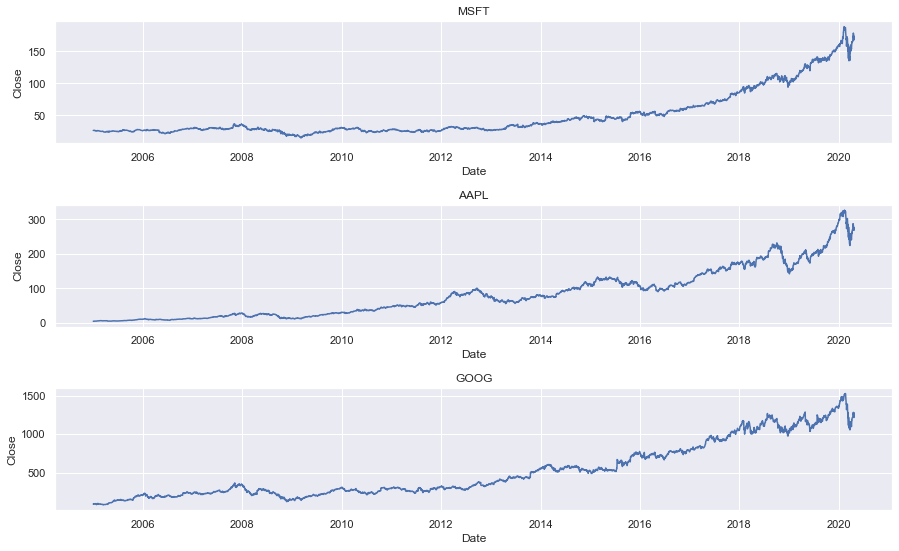

In [5]:
plt.figure(figsize=(15, 9))

for i, company in enumerate(companies):
    plt.subplot(3, 1, i+1)
    data_tmp = data[company].copy()
    data_tmp.reset_index(inplace=True)
    ax = sns.lineplot(x="Date", y="Close", data=data_tmp)
    ax.set_title(company)

plt.subplots_adjust(hspace=0.5)

### Similar plots, but with a logarithmic scale

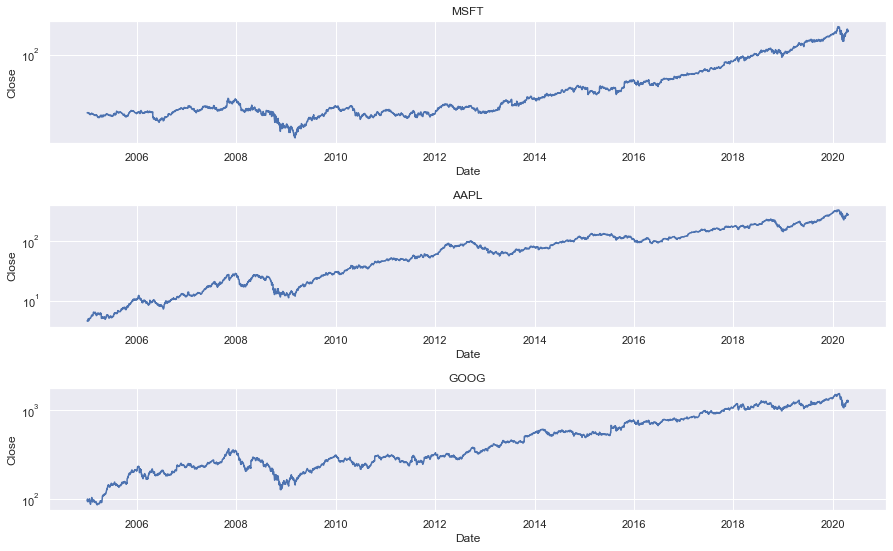

In [6]:
plt.figure(figsize=(15, 9))

for i, company in enumerate(companies):
    plt.subplot(3, 1, i+1)
    data_tmp = data[company].copy()
    data_tmp.reset_index(inplace=True)
    g = sns.lineplot(x="Date", y="Close", data=data_tmp)
    g.set_title(company)
    g.set(yscale="log")

plt.subplots_adjust(hspace=0.5)

# Computing daily change

In [14]:
daily_change = pd.DataFrame()
for company in companies:
    daily_change[company] = data[company]['Close']
    
daily_change = daily_change.pct_change()

daily_change.reset_index(inplace=True)

In [15]:
daily_change.head()

,Date,MSFT,AAPL,GOOG
0,2004-12-31,NaN,NaN,NaN
1,2005-01-03,0.000749,-0.017236,0.051455
2,2005-01-04,0.003740,0.010270,-0.040501
3,2005-01-05,-0.002235,0.008758,-0.005090
4,2005-01-06,-0.001120,0.000775,-0.025632


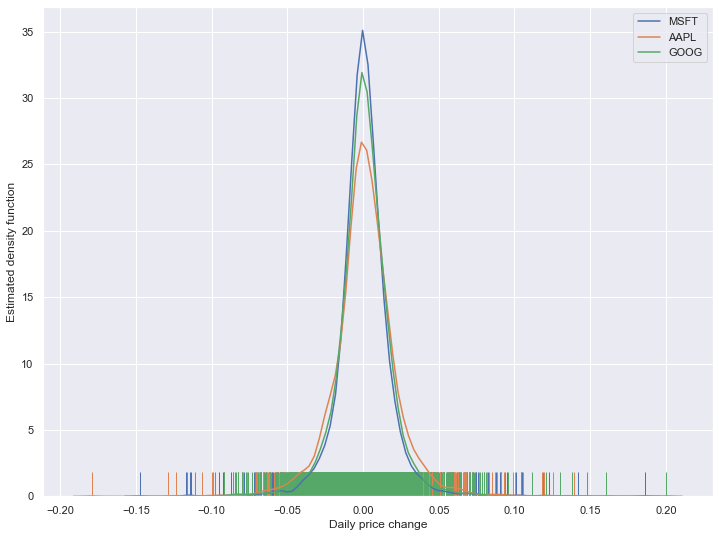

In [55]:
plt.figure(figsize=(12,9))

for company in companies:
    sns.distplot(daily_change[company], hist=False, label=company, rug=True)

plt.xlabel('Daily price change')
plt.ylabel('Estimated density function')

plt.legend()
plt.show()

### Check normality of the distributions and their statistics
Daily percent changes in values are normally distributed over a long period of time. Since we investigate a perion of growth, it is no surprise that the mean is positive.

Note that the standard deviation (volatility) of Microsoft stock is the smallest among chosen companies. In the chosen period of time, it is the most established company and hence, the least volatile. It also has the smallest mean daily growth, followed by Google and surpassed twicefold by Apple.

In [74]:
for company in companies:
    mean = daily_change[company].mean()
    std = daily_change[company].std()

    _, p_normaltest = normaltest(daily_change[company], nan_policy='omit')
    statistic_anderson, confidence_anderson, significance_anderson = anderson(daily_change[company].dropna(), dist='norm')    

    print(f"{company}")
    if statistic_anderson > confidence_anderson[-1]:
        print(f"Null hypothesis that the sample comes from the normal distribution can be rejected with threshold p_value={significance_anderson[-1]}% according to the Anderson test")
    
    print(f"Null hypothesis about normality of the distribution using D’Agostino test can be rejected with p-value={p_normaltest}")    
    print(f"Mean change for {company}: {mean}")
    print(f"Standard deviation of the change for {company}: {std}")
    print("\n")

MSFT
Null hypothesis that the sample comes from the normal distribution can be rejected with threshold p_value=1.0% according to the Anderson test
Null hypothesis about normality of the distribution using D’Agostino test can be rejected with p-value=6.335515469763846e-180
Mean change for MSFT: 0.0006299978693265658
Standard deviation of the change for MSFT: 0.017196634348826765


AAPL
Null hypothesis that the sample comes from the normal distribution can be rejected with threshold p_value=1.0% according to the Anderson test
Null hypothesis about normality of the distribution using D’Agostino test can be rejected with p-value=3.379956486388138e-103
Mean change for AAPL: 0.0012815017970461199
Standard deviation of the change for AAPL: 0.020928319366219892


GOOG
Null hypothesis that the sample comes from the normal distribution can be rejected with threshold p_value=1.0% according to the Anderson test
Null hypothesis about normality of the distribution using D’Agostino test can be reject

# Check if the distributions differ significantly between them
Wilcoxon non-parametric signed rank test does not show statistically significant difference between the means of daily changes. This test was chosen as it allows for correlated samples.

However, according to the Bartlett's test, the null-hypothesis about the equality of variances can be rejected with great certainty.

In [96]:
for corp1, corp2 in combinations(companies, 2):
    _, p_wilcoxon = wilcoxon(daily_change[corp1].dropna(), daily_change[corp2].dropna())
    _, p_bartlett = bartlett(daily_change[corp1].dropna(), daily_change[corp2].dropna())    
    print(f"Daily value changes of {corp1} and {corp2} have different means with p-value={p_wilcoxon}.")
    print(f"Daily value changes of {corp1} and {corp2} have different variances with p-value={p_bartlett}.")

Daily value changes of MSFT and AAPL have different means with p-value=0.051246948895601614.
Daily value changes of MSFT and AAPL have different variances with p-value=5.793824199537289e-34.
Daily value changes of MSFT and GOOG have different means with p-value=0.9769117416443059.
Daily value changes of MSFT and GOOG have different variances with p-value=1.999085675890633e-08.
Daily value changes of AAPL and GOOG have different means with p-value=0.06441265466463093.
Daily value changes of AAPL and GOOG have different variances with p-value=5.168734575023758e-11.
